In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns


/Users/darshanvijayaraghavan/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the data
training_df = pd.read_csv("./training.csv")

# Data preprocessing
training_df.fillna(0, inplace=True)  # Handle missing values
training_df.drop(['date', 'month'], axis=1, inplace=True)  # Drop irrelevant columns

# Separate features and target
X = training_df.drop('fire', axis=1)
y = training_df['fire']


In [3]:
# Split the data again using selected features
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Standardize the features
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)  # Use transform, not fit_transform, on test data


In [4]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_transformed, y_train)

# Make predictions
y_pred = knn.predict(X_test_transformed)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[13437  7995]
 [ 4001 17476]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.63      0.69     21432
           1       0.69      0.81      0.74     21477

    accuracy                           0.72     42909
   macro avg       0.73      0.72      0.72     42909
weighted avg       0.73      0.72      0.72     42909


Accuracy Score: 0.7204316110839218


In [ ]:

param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_knn = grid_search.best_estimator_

In [ ]:
best_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='uniform')
best_knn.fit(X_train_transformed, y_train)
y_pred = best_knn.predict(X_test_transformed)
y_scores = best_knn.predict_proba(X_test_transformed)[:, 1]
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Predictions
y_train_pred = best_knn.predict(X_train_transformed)
y_test_pred = best_knn.predict(X_test_transformed)



Confusion Matrix:
 [[15199  6233]
 [ 4073 17404]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75     21432
           1       0.74      0.81      0.77     21477

    accuracy                           0.76     42909
   macro avg       0.76      0.76      0.76     42909
weighted avg       0.76      0.76      0.76     42909


Accuracy Score: 0.759817287748491


In [7]:

y_scores = best_knn.predict_proba(X_test_transformed)[:, 1]

In [6]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Training Accuracy: 98.13%
Test Accuracy: 75.98%
Precision: 73.63%
Recall: 81.04%
F1 Score: 77.16%


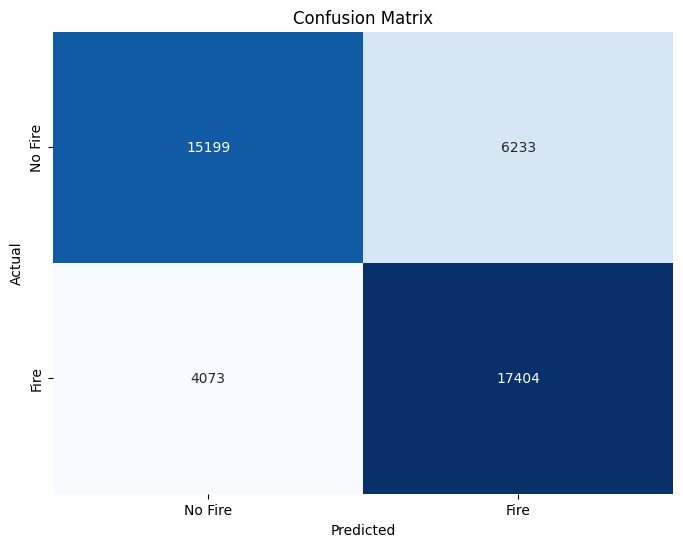

In [7]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Fire', 'Fire'],
            yticklabels=['No Fire', 'Fire'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

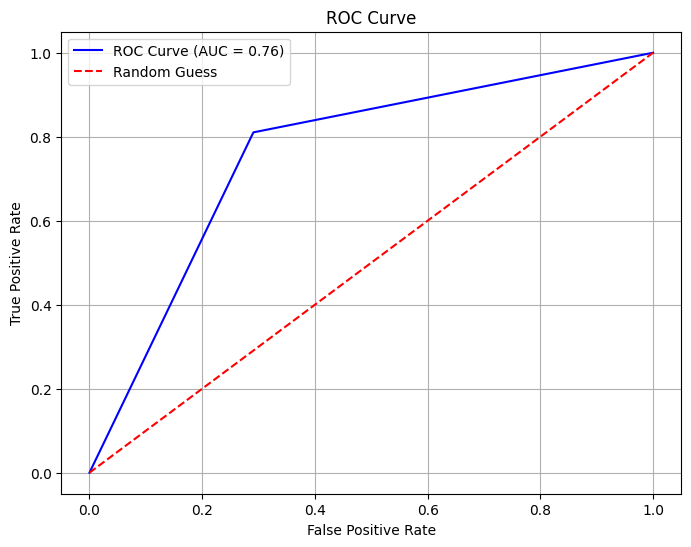

In [8]:


auc_score = roc_auc_score(y_test, y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()